## Observations and Insights 

In [30]:
print("Observations and Insights")
print("1) Capomulin & Ramicane were the two Drug Regimen with the highest Total Timepoints as observed from the bar chart.")
print("2a) For the four selected treatment Regimens there was only 1 outlier of the Final Tumor Volume for all mice as observed from the box & whisker plot. Hence possibly strong experiment conditions.")
print("2b) Additionally Capomulin & Ramicane had lower Tumor Volumes across all mice and Infubinol & Ceftamin show higher Tumor Volumes. Hence the latter two may require further study.")
print("3) For Average Tumor Volume vs. Mouse Weight for Capomulin Regimen there is a strong correlation as observed from the scatter plot. Hence a healthy weight is important to try to achieve.")

Observations and Insights
1) Capomulin & Ramicane were the two Drug Regimen with the highest Total Timepoints as observed from the bar chart.
2a) For the four selected treatment Regimens there was only 1 outlier of the Final Tumor Volume for all mice as observed from the box & whisker plot. Hence possibly strong experiment conditions.
2b) Additionally Capomulin & Ramicane had lower Tumor Volumes across all mice and Infubinol & Ceftamin show higher Tumor Volumes. Hence the latter two may require further study.
3) For Average Tumor Volume vs. Mouse Weight for Capomulin Regimen there is a strong correlation as observed from the scatter plot. Hence a healthy weight is important to try to achieve.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. Display the number of unique mice IDs in the data
Number_of_Mice = len(merge_df["Mouse ID"].unique())
Number_of_Mice

249

In [3]:
# Duplicate rows of data
merge_df[merge_df.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Getting the duplicate mice that shows up for Mouse ID and Timepoint. Check for any mouse ID with duplicate time points
Duplicate = merge_df["Mouse ID"] + [" "] + merge_df["Timepoint"].astype(str)

# Optional: Get all the data for the duplicate mouse ID. 
Check = Duplicate[Duplicate.duplicated(keep=False)]
Check

# print("Mouse_ID = g989 has duplicate time points")

908     g989 0
909     g989 0
910     g989 5
911     g989 5
912    g989 10
913    g989 10
914    g989 15
915    g989 15
916    g989 20
917    g989 20
dtype: object

In [5]:
# Check Mouse_ID g989 for how many rows of data should be removed
SetIndex_merge_df = merge_df.set_index("Mouse ID")
SetIndex_merge_df

SpecificID_SetIndex_merge_df = SetIndex_merge_df.loc["g989"]
len(SpecificID_SetIndex_merge_df)

13

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Clean_timepoints_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
SetIndex_merge_df = merge_df.set_index("Mouse ID")
# Set_index_merge_df
Clean_df = SetIndex_merge_df.drop(labels=["g989"],axis=0,inplace=False)
Clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_reset = Clean_df.reset_index()
len(Clean_reset["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties of each drug regimen
Clean_reset_grouped = Clean_reset.groupby(["Drug Regimen"])

# This should result in five unique series objects
Regimen_mean = Clean_reset_grouped["Tumor Volume (mm3)"].mean()
Regimen_median = Clean_reset_grouped["Tumor Volume (mm3)"].median()
Regimen_var = Clean_reset_grouped["Tumor Volume (mm3)"].var()
Regimen_stddev = Clean_reset_grouped["Tumor Volume (mm3)"].std()
Regimen_sem = Clean_reset_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe
summary_stats_table = pd.DataFrame({"Mean":Regimen_mean, "Median":Regimen_median, "Variance":Regimen_var, "Std Dev":Regimen_stddev, "SEM":Regimen_sem})
summary_stats_table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Clean_reset_grouped = Clean_reset.groupby(["Drug Regimen"])
# Regimen_mean = Clean_reset_grouped["Tumor Volume (mm3)"].agg(["mean"])
# Regimen_all = Clean_reset_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Regimen_all

summary_stats_table2 = Clean_reset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

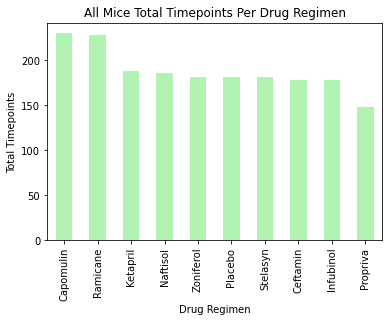

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Using Pandas to plot bar graph
Total_timepoints = Clean_reset_grouped["Timepoint"].count()
# Total_Timepoints

Total_timepoints.sort_values(ascending=False).plot(kind="bar", title="All Mice Total Timepoints Per Drug Regimen", ylabel="Total Timepoints", color=(0.4, 0.9, 0.4, 0.5))
plt.show()

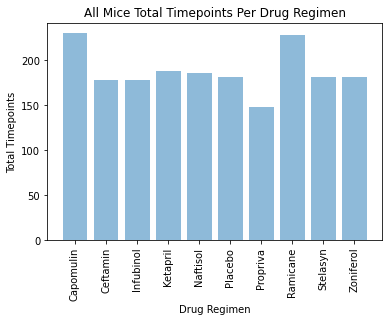

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Using Matplotlib to plot bar graph
Total_timepoints = Clean_reset_grouped["Timepoint"].count()
# Total_timepoints

x_axis = Total_timepoints.index
y_axis = Total_timepoints.values

plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks(rotation="vertical")

plt.title("All Mice Total Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.show()

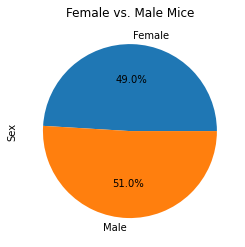

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Using Pandas to plot pie graph
Clean_reset_grouped_gender = Clean_reset.groupby(["Sex"])
Gender = Clean_reset_grouped_gender["Sex"].count()
# Gender
Gender.plot(kind="pie", title="Female vs. Male Mice", autopct="%1.1f%%")
plt.show()

In [13]:
Gender

Sex
Female    922
Male      958
Name: Sex, dtype: int64

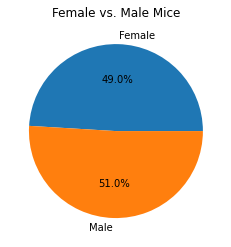

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Using Matplotlib to plot pie graph
Clean_reset_grouped_gender = Clean_reset.groupby(["Sex"])
Gender = Clean_reset_grouped_gender["Sex"].count()
# Gender

plt.pie(Gender, labels=["Female", "Male"], autopct="%1.1f%%")

plt.title("Female vs. Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
Clean_reset_grouped.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Clean_reset_grouped_ID = Clean_reset.groupby(["Mouse ID"])
Max_TimeTumor = Clean_reset_grouped_ID["Timepoint"].max()
Max_TimeTumor_df = pd.DataFrame(Max_TimeTumor)
Max_TimeTumor_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merge_CleanReset_MaxTimeTumor_df = pd.merge(Clean_reset, Max_TimeTumor_df, on=("Mouse ID", "Timepoint"), how="right")
Merge_CleanReset_MaxTimeTumor_df

# Same steps as above except ["Timepoint"] replace with ["Tumor Volume (mm3)"] will generate the same result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

TumorVolData_Capomulin = Merge_CleanReset_MaxTimeTumor_df.set_index("Drug Regimen").loc["Capomulin",:]
TumorVolData_Capomulin

TumorVolData_Ramicane = Merge_CleanReset_MaxTimeTumor_df.set_index("Drug Regimen").loc["Ramicane",:]
TumorVolData_Ramicane

TumorVolData_Infubinol = Merge_CleanReset_MaxTimeTumor_df.set_index("Drug Regimen").loc["Infubinol",:]
TumorVolData_Infubinol

TumorVolData_Ceftamin = Merge_CleanReset_MaxTimeTumor_df.set_index("Drug Regimen").loc["Ceftamin",:]
TumorVolData_Ceftamin

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ceftamin,a275,Female,20,28,45,62.999356,3
Ceftamin,b447,Male,2,30,0,45.000000,0
Ceftamin,b487,Female,6,28,25,56.057749,1
Ceftamin,b759,Female,12,25,30,55.742829,1
Ceftamin,f436,Female,3,25,15,48.722078,2
Ceftamin,h531,Male,5,27,5,47.784682,0
Ceftamin,j296,Female,24,30,45,61.849023,3
Ceftamin,k210,Male,15,28,45,68.923185,3
Ceftamin,l471,Female,7,28,45,67.748662,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# TumorVolData_Capomulin = []
# TumorVolData_Ramicane = []
# TumorVolData_Infubinol = []
# TumorVolData_Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
TumorVolData_Capomulin_min = TumorVolData_Capomulin["Tumor Volume (mm3)"].min()
TumorVolData_Capomulin_max = TumorVolData_Capomulin["Tumor Volume (mm3)"].max()
TumorVolData_Capomulin_quartiles = TumorVolData_Capomulin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
TumorVolData_Capomulin_lowerq = TumorVolData_Capomulin_quartiles[0.25]
TumorVolData_Capomulin_upperq = TumorVolData_Capomulin_quartiles[0.75]
TumorVolData_Capomulin_iqr = TumorVolData_Capomulin_upperq-TumorVolData_Capomulin_lowerq
TumorVolData_Capomulin_lower_bound = TumorVolData_Capomulin_lowerq - (1.5*TumorVolData_Capomulin_iqr)
TumorVolData_Capomulin_upper_bound = TumorVolData_Capomulin_upperq + (1.5*TumorVolData_Capomulin_iqr)
TumorVolData_Capomulin_median = TumorVolData_Capomulin["Tumor Volume (mm3)"].median()

TumorVolData_Ramicane_min = TumorVolData_Ramicane["Tumor Volume (mm3)"].min()
TumorVolData_Ramicane_max = TumorVolData_Ramicane["Tumor Volume (mm3)"].max()
TumorVolData_Ramicane_quartiles = TumorVolData_Ramicane["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
TumorVolData_Ramicane_lowerq = TumorVolData_Ramicane_quartiles[0.25]
TumorVolData_Ramicane_upperq = TumorVolData_Ramicane_quartiles[0.75]
TumorVolData_Ramicane_iqr = TumorVolData_Ramicane_upperq-TumorVolData_Ramicane_lowerq
TumorVolData_Ramicane_lower_bound = TumorVolData_Ramicane_lowerq - (1.5*TumorVolData_Ramicane_iqr)
TumorVolData_Ramicane_upper_bound = TumorVolData_Ramicane_upperq + (1.5*TumorVolData_Ramicane_iqr)
TumorVolData_Ramicane_median = TumorVolData_Ramicane["Tumor Volume (mm3)"].median()

TumorVolData_Infubinol_min = TumorVolData_Infubinol["Tumor Volume (mm3)"].min()
TumorVolData_Infubinol_max = TumorVolData_Infubinol["Tumor Volume (mm3)"].max()
TumorVolData_Infubinol_quartiles = TumorVolData_Infubinol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
TumorVolData_Infubinol_lowerq = TumorVolData_Infubinol_quartiles[0.25]
TumorVolData_Infubinol_upperq = TumorVolData_Infubinol_quartiles[0.75]
TumorVolData_Infubinol_iqr = TumorVolData_Infubinol_upperq-TumorVolData_Infubinol_lowerq
TumorVolData_Infubinol_lower_bound = TumorVolData_Infubinol_lowerq - (1.5*TumorVolData_Infubinol_iqr)
TumorVolData_Infubinol_upper_bound = TumorVolData_Infubinol_upperq + (1.5*TumorVolData_Infubinol_iqr)
TumorVolData_Infubinol_median = TumorVolData_Infubinol["Tumor Volume (mm3)"].median()

TumorVolData_Ceftamin_min = TumorVolData_Ceftamin["Tumor Volume (mm3)"].min()
TumorVolData_Ceftamin_max = TumorVolData_Ceftamin["Tumor Volume (mm3)"].max()
TumorVolData_Ceftamin_quartiles = TumorVolData_Ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
TumorVolData_Ceftamin_lowerq = TumorVolData_Ceftamin_quartiles[0.25]
TumorVolData_Ceftamin_upperq = TumorVolData_Ceftamin_quartiles[0.75]
TumorVolData_Ceftamin_iqr = TumorVolData_Ceftamin_upperq-TumorVolData_Ceftamin_lowerq
TumorVolData_Ceftamin_lower_bound = TumorVolData_Ceftamin_lowerq - (1.5*TumorVolData_Ceftamin_iqr)
TumorVolData_Ceftamin_upper_bound = TumorVolData_Ceftamin_upperq + (1.5*TumorVolData_Ceftamin_iqr)
TumorVolData_Ceftamin_median = TumorVolData_Ceftamin["Tumor Volume (mm3)"].median()

StatsTable = pd.DataFrame({"Regimen": Treatments,
                           "Min": [TumorVolData_Capomulin_min, TumorVolData_Ramicane_min, TumorVolData_Infubinol_min, TumorVolData_Ceftamin_min],
                           "Max": [TumorVolData_Capomulin_max, TumorVolData_Ramicane_max, TumorVolData_Infubinol_max, TumorVolData_Ceftamin_max],
                           "Lower Quartile": [TumorVolData_Capomulin_lowerq, TumorVolData_Ramicane_lowerq, TumorVolData_Infubinol_lowerq, TumorVolData_Ceftamin_lowerq],
                           "Upper Quartile": [TumorVolData_Capomulin_upperq, TumorVolData_Ramicane_upperq, TumorVolData_Infubinol_upperq, TumorVolData_Ceftamin_upperq],
                           "IQR": [TumorVolData_Capomulin_iqr, TumorVolData_Ramicane_iqr, TumorVolData_Infubinol_iqr, TumorVolData_Ceftamin_iqr],
                           "Lower Bound": [TumorVolData_Capomulin_lower_bound, TumorVolData_Ramicane_lower_bound, TumorVolData_Infubinol_lower_bound, TumorVolData_Ceftamin_lower_bound],
                           "Upper Bound": [TumorVolData_Capomulin_upper_bound, TumorVolData_Ramicane_upper_bound, TumorVolData_Infubinol_upper_bound, TumorVolData_Ceftamin_upper_bound],
                           "Median":[TumorVolData_Capomulin_median, TumorVolData_Ramicane_median, TumorVolData_Infubinol_median, TumorVolData_Ceftamin_median]})

StatsTable.style.format({"Min": "{:.3f}", 
                         "Max": "{:.3f}", 
                         "Lower Quartile": "{:.3f}", 
                         "Upper Quartile": "{:.3f}", 
                         "IQR": "{:.3f}", 
                         "Lower Bound": "{:.3f}", 
                         "Upper Bound": "{:.3f}", 
                         "Median": "{:.3f}"})

,Regimen,Min,Max,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound,Median
0,Capomulin,23.344,47.686,32.377,40.159,7.782,20.705,51.832,38.125
1,Ramicane,22.050,45.221,31.560,40.659,9.099,17.913,54.307,36.562
2,Infubinol,36.321,72.227,54.049,65.526,11.477,36.833,82.741,60.165
3,Ceftamin,45.000,68.923,48.722,64.300,15.578,25.355,87.666,59.852


In [19]:
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
        
    # Determine outliers using upper and lower bounds
    
print("Outliers exist less than the lower bound and greater than the upper bound")
print(" ")
print("Outlier exists in Drug Regimen Infubinol where min = 36.321 i.e. less than lower bound = 36.833") 
print("Hence Mouse ID = c326 is an outlier")

Outliers exist less than the lower bound and greater than the upper bound
 
Outlier exists in Drug Regimen Infubinol where min = 36.321 i.e. less than lower bound = 36.833
Hence Mouse ID = c326 is an outlier


C:\Users\viksh\AppData\Local\Temp/ipykernel_13776/2168607799.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Treatments)


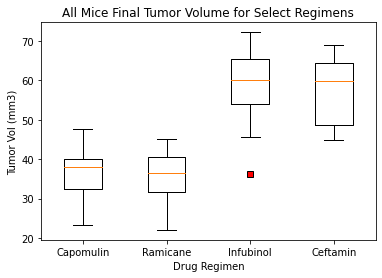

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("All Mice Final Tumor Volume for Select Regimens") 
ax1.set_xlabel("Drug Regimen") 
ax1.set_ylabel("Tumor Vol (mm3)") 

# Renaming each boxplot to corresponding Drug Regimen
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.set_xticklabels(Treatments)
# # Not working 
# plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) 

# Dsiplaying outliers and formating the marker
Outlier_Infubinol = dict(markerfacecolor = "r", marker = "s", markeredgecolor = "black")

# Plotting multiple boxplots in the same graph
SelectRegimens = [TumorVolData_Capomulin["Tumor Volume (mm3)"], TumorVolData_Ramicane["Tumor Volume (mm3)"], 
                 TumorVolData_Infubinol["Tumor Volume (mm3)"], TumorVolData_Ceftamin["Tumor Volume (mm3)"]]

ax1.boxplot(SelectRegimens, flierprops = Outlier_Infubinol)
plt.savefig("VS_Boxplot")
plt.show()


## Line and Scatter Plots

Example of mice treated with Capomulin are Mouse ID: i557 or b128


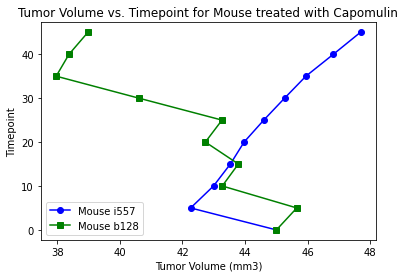

<Figure size 432x288 with 0 Axes>

In [21]:
# Select a mouse that was treated with Capomulin 
print("Example of mice treated with Capomulin are Mouse ID: i557 or b128")

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse ID i557
Mouse_i557_SetIndex_merge_df = SetIndex_merge_df.loc["i557"]
Mouse_i557_SetIndex_merge_df

xi557_axis = Mouse_i557_SetIndex_merge_df["Tumor Volume (mm3)"]
yi557_axis = Mouse_i557_SetIndex_merge_df["Timepoint"]

# Mouse ID b128
Mouse_b128_SetIndex_merge_df = SetIndex_merge_df.loc["b128"]
Mouse_b128_SetIndex_merge_df

xb128_axis = Mouse_b128_SetIndex_merge_df["Tumor Volume (mm3)"]
yb128_axis = Mouse_b128_SetIndex_merge_df["Timepoint"]

# Graphing
plt.title("Tumor Volume vs. Timepoint for Mouse treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

plt.plot(xi557_axis, yi557_axis, marker="o", color="b", label="Mouse i557")
plt.plot(xb128_axis, yb128_axis, marker="s", color="g", label="Mouse b128")

plt.legend()
plt.show()
plt.savefig("VS_Lineplot")

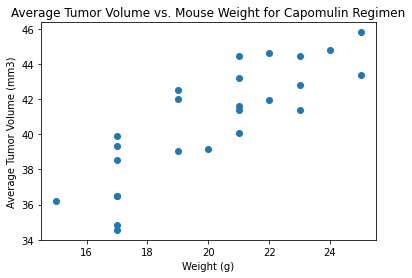

<Figure size 432x288 with 0 Axes>

In [22]:
CapomulinScatter_df = Clean_reset.loc[Clean_reset["Drug Regimen"] == "Capomulin",:]
Mean_CapomulinScatter_df = CapomulinScatter_df.groupby(['Mouse ID']).mean()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_x_axis = Mean_CapomulinScatter_df["Weight (g)"]
Capomulin_y_axis = Mean_CapomulinScatter_df["Tumor Volume (mm3)"]
plt.scatter(Capomulin_x_axis,Capomulin_y_axis)

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
plt.savefig("VS_Scatterplot")

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_x_axis,Capomulin_y_axis)
print(f"Correlation coefficient is {round(correlation[0],3)}")

Correlation coefficient is 0.842


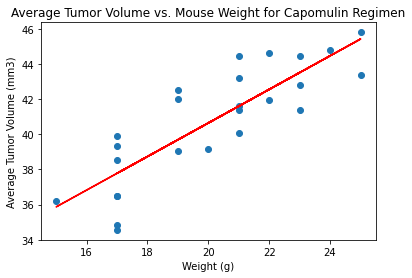

{'y = 0.95x + 21.55'}


<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_x_axis, Capomulin_y_axis)
regress_values = Capomulin_x_axis*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Capomulin_x_axis,Capomulin_y_axis)
plt.plot(Capomulin_x_axis, regress_values, "r-")

# plt.annotate(line_eq,(200,200),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
plt.savefig("VS_Scatterplot_LinearRegression")
print({line_eq})

In [29]:
print("Observations and Insights")
print("1) Capomulin & Ramicane were the two Drug Regimen with the highest Total Timepoints as observed from the bar chart.")
print("2a) For the four selected treatment Regimens there was only 1 outlier of the Final Tumor Volume for all mice as observed from the box & whisker plot. Hence possibly strong experiment conditions.")
print("2b) Additionally Capomulin & Ramicane had lower Tumor Volumes across all mice and Infubinol & Ceftamin show higher Tumor Volumes. Hence the latter two may require further study.")
print("3) For Average Tumor Volume vs. Mouse Weight for Capomulin Regimen there is a strong correlation as observed from the scatter plot. Hence a healthy weight is important to try to achieve.")

Observations and Insights
1) Capomulin & Ramicane were the two Drug Regimen with the highest Total Timepoints as observed from the bar chart.
2a) For the four selected treatment Regimens there was only 1 outlier of the Final Tumor Volume for all mice as observed from the box & whisker plot. Hence possibly strong experiment conditions.
2b) Additionally Capomulin & Ramicane had lower Tumor Volumes across all mice and Infubinol & Ceftamin show higher Tumor Volumes. Hence the latter two may require further study.
3) For Average Tumor Volume vs. Mouse Weight for Capomulin Regimen there is a strong correlation as observed from the scatter plot. Hence a healthy weight is important to try to achieve.
